In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

**PART 1 & 2**

In [7]:
csvfile = 'edge_list.csv'

In [17]:
G = nx.Graph()

In [18]:
def graph_built_undirected(csvfile):
  df = pd.read_csv(csvfile)
  edges=[]
  for i in range(len(df)):
    edges.append((df.Source[i],df.Destination[i],int(df.Weight[i])))

  G.add_weighted_edges_from(edges)
  edge_labels = nx.get_edge_attributes(G, "weight")
  # getting different graph attributes
  print("Total number of nodes: ", int(G.number_of_nodes()))
  print("Total number of edges: ", int(G.number_of_edges()))
  print("List of all nodes: ", list(G.nodes()))
  print("List of all edges: ", list(G.edges()))
  print("Degree for all nodes: ", dict(G.degree()))
  print("Max Degree Node: ", max(zip(dict(G.degree()).values(), dict(G.degree()).keys()))[1])
  print("Min Degree Node: ", min(zip(dict(G.degree()).values(), dict(G.degree()).keys()))[1])
  nx.draw_networkx(G, with_labels = True)
  plt.savefig("Undirected_Graph.png", format="PNG")
  #pos = nx.spring_layout(G, seed=7) 
  #nx.draw_networkx_edge_labels(G, pos, edge_labels)



Total number of nodes:  10
Total number of edges:  15
List of all nodes:  [0, 1, 2, 8, 9, 4, 6, 3, 7, 5]
List of all edges:  [(0, 1), (0, 2), (0, 8), (0, 9), (1, 4), (1, 6), (2, 3), (2, 6), (8, 5), (9, 5), (4, 7), (4, 5), (6, 7), (3, 7), (3, 5)]
Degree for all nodes:  {0: 4, 1: 3, 2: 3, 8: 2, 9: 2, 4: 3, 6: 3, 3: 3, 7: 3, 5: 4}
Max Degree Node:  5
Min Degree Node:  8


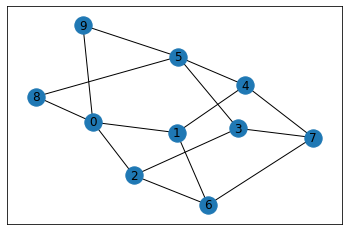

In [19]:
graph_built_undirected(csvfile)

In [20]:
G2= nx.DiGraph()

In [21]:
def graph_built_directed(csvfile):
  edges=[]
  df = pd.read_csv(csvfile)
  for i in range(len(df)):
    edges.append((df.Source[i],df.Destination[i]))

  G2.add_edges_from(edges)
  # getting different graph attributes
  print("Total number of nodes: ", int(G2.number_of_nodes()))
  print("Total number of edges: ", int(G2.number_of_edges()))
  print("List of all nodes: ", list(G2.nodes()))
  print("List of all edges: ", list(G2.edges()))
  print("In-degree for all nodes: ", dict(G2.in_degree()))  
  print("Out degree for all nodes: ", dict(G2.out_degree))
  #print("Max In Degree Node: ", max(zip(dict(G2.in_degree()).values(), dict(G2.in_degree()).keys()))[1])
  #print("Min In Degree Node: ", min(zip(dict(G2.in_degree()).values(), dict(G2.in_degree()).keys()))[1])
  #print("Max Out Degree Node: ", max(zip(dict(G2.out_degree()).values(), dict(G2.out_degree()).keys()))[1])
  #print("Min Out Degree Node: ", min(zip(dict(G2.out_degree()).values(), dict(G2.out_degree()).keys()))[1])
  nx.draw_networkx(G2, with_labels = True)
  plt.savefig("Directed_Graph.png", format="PNG")


Total number of nodes:  10
Total number of edges:  15
List of all nodes:  [0, 1, 2, 8, 9, 4, 6, 3, 7, 5]
List of all edges:  [(0, 1), (0, 2), (0, 8), (0, 9), (1, 4), (1, 6), (2, 3), (2, 6), (8, 5), (9, 5), (4, 7), (4, 5), (6, 7), (3, 7), (3, 5)]
In-degree for all nodes:  {0: 0, 1: 1, 2: 1, 8: 1, 9: 1, 4: 1, 6: 2, 3: 1, 7: 3, 5: 4}
Out degree for all nodes:  {0: 4, 1: 2, 2: 2, 8: 1, 9: 1, 4: 2, 6: 1, 3: 2, 7: 0, 5: 0}


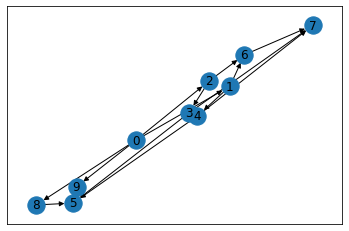

In [22]:
graph_built_directed(csvfile)

**PART 3**

In [23]:
def undirected_Adj_matrix(G):
  undirected_Adj_mat = nx.adjacency_matrix(G)
  print(undirected_Adj_mat.todense())
  udg_node = int(input("Enter Node: "))
  udg_sum = 0
  for i in range(len(undirected_Adj_mat.todense()[udg_node])):
    udg_sum = udg_sum +  int(undirected_Adj_mat.todense()[udg_node][i])
  print(f"Sum for Node {udg_node} is {udg_sum}")

In [24]:
undirected_Adj_matrix(G)

[[0 5 6 7 2 0 0 0 0 0]
 [5 0 0 0 0 5 3 0 0 0]
 [6 0 0 0 0 0 3 2 0 0]
 [7 0 0 0 0 0 0 0 0 1]
 [2 0 0 0 0 0 0 0 0 2]
 [0 5 0 0 0 0 0 0 3 4]
 [0 3 3 0 0 0 0 0 1 0]
 [0 0 2 0 0 0 0 0 3 3]
 [0 0 0 0 0 3 1 3 0 0]
 [0 0 0 1 2 4 0 3 0 0]]
Enter Node: 0
Sum for Node 0 is 20


In [25]:
def directed_Adj_matrix(G):
  directed_Adj_mat = nx.adjacency_matrix(G2)
  print(directed_Adj_mat.todense())

  dg_node = int(input("Enter Node: "))

  dg_sum = 0
  for i in range(len(directed_Adj_mat.todense()[dg_node])):
    dg_sum = dg_sum +  int(directed_Adj_mat.todense()[dg_node][i])

  for i in range(len(directed_Adj_mat.todense()[dg_node])):
    dg_sum = dg_sum +  int(directed_Adj_mat.todense()[i][dg_node])
   
  print(f"Sum for Node {dg_node} is {dg_sum}")

In [26]:
directed_Adj_matrix(G2)

[[0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Enter Node: 0
Sum for Node 0 is 4


**PART 4**

In [27]:
def dict_round(s_r_dict):
  s_r_dict = dict(sorted(s_r_dict.items()))
  for key in s_r_dict:
    s_r_dict[key] = round(s_r_dict[key], 2)
  return s_r_dict

**Undirected Graph**

In [28]:
deg_centrality = nx.degree_centrality(G)
print(deg_centrality)
udg_deg_centrality = dict_round(deg_centrality)
print(udg_deg_centrality)

{0: 0.4444444444444444, 1: 0.3333333333333333, 2: 0.3333333333333333, 8: 0.2222222222222222, 9: 0.2222222222222222, 4: 0.3333333333333333, 6: 0.3333333333333333, 3: 0.3333333333333333, 7: 0.3333333333333333, 5: 0.4444444444444444}
{0: 0.44, 1: 0.33, 2: 0.33, 3: 0.33, 4: 0.33, 5: 0.44, 6: 0.33, 7: 0.33, 8: 0.22, 9: 0.22}


In [29]:
closeness_centrality = nx.closeness_centrality(G)
print(closeness_centrality)
udg_closeness_centrality = dict_round(closeness_centrality)
print(udg_closeness_centrality)

{0: 0.6, 1: 0.5625, 2: 0.5625, 8: 0.5, 9: 0.5, 4: 0.5625, 6: 0.5, 3: 0.5625, 7: 0.5, 5: 0.6}
{0: 0.6, 1: 0.56, 2: 0.56, 3: 0.56, 4: 0.56, 5: 0.6, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5}


In [30]:
betweeness_centrality = nx.closeness_centrality(G)
print(betweeness_centrality)
udg_betweeness_centrality = dict_round(betweeness_centrality)
print(udg_betweeness_centrality)

{0: 0.6, 1: 0.5625, 2: 0.5625, 8: 0.5, 9: 0.5, 4: 0.5625, 6: 0.5, 3: 0.5625, 7: 0.5, 5: 0.6}
{0: 0.6, 1: 0.56, 2: 0.56, 3: 0.56, 4: 0.56, 5: 0.6, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5}


In [31]:
eigen_vector_centrality = nx.eigenvector_centrality(G)
print(eigen_vector_centrality)
udg_eigen_vector_centrality = dict_round(eigen_vector_centrality)
print(udg_eigen_vector_centrality)

{0: 0.3653174543118881, 1: 0.3258426715842208, 2: 0.3258426715842208, 8: 0.23707927944951493, 9: 0.23707927944951493, 4: 0.3258426715842208, 6: 0.313033032730566, 3: 0.3258426715842208, 7: 0.313033032730566, 5: 0.36531745431188817}
{0: 0.37, 1: 0.33, 2: 0.33, 3: 0.33, 4: 0.33, 5: 0.37, 6: 0.31, 7: 0.31, 8: 0.24, 9: 0.24}


In [32]:
udf = pd.DataFrame.from_dict(udg_deg_centrality,orient='index',columns=['Degree_Centrality'])
udf = udf.assign(Closeness_Centrality= udg_closeness_centrality.values())
udf = udf.assign(Betweeness_Centrality= udg_betweeness_centrality.values())
udf = udf.assign(Eigen_Vector_Centrality= udg_eigen_vector_centrality.values())

In [33]:
udf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality,Eigen_Vector_Centrality
0,0.44,0.60,0.60,0.37
1,0.33,0.56,0.56,0.33
2,0.33,0.56,0.56,0.33
3,0.33,0.56,0.56,0.33
4,0.33,0.56,0.56,0.33
5,0.44,0.60,0.60,0.37
6,0.33,0.50,0.50,0.31
7,0.33,0.50,0.50,0.31
8,0.22,0.50,0.50,0.24
9,0.22,0.50,0.50,0.24


In [34]:
udf.to_csv('All Centality Degrees (Undirected Graph).csv')

In [35]:
def find_node_min_centarlity(udf,cent_name):
  min = 100
  node_min = -1
  for i in range(len(udf)):
    if udf[cent_name][i] < min:
      min =  udf[cent_name][i]
      node_min = i
  return node_min,min

def find_node_max_centarlity(udf,cent_name):
  max = 0
  node_max = -1
  for i in range(len(udf)):
    if udf[cent_name][i] > max:
      max =  udf[cent_name][i]
      node_max = i
  return node_max,max
  

In [36]:
node_min,min = find_node_min_centarlity(udf,'Degree_Centrality')
node_max,max = find_node_max_centarlity(udf,'Degree_Centrality')
print(node_min,min)
print(node_max,max)
degree_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}


8 0.22
0 0.44


In [37]:
node_min,min = find_node_min_centarlity(udf,'Closeness_Centrality')
node_max,max = find_node_max_centarlity(udf,'Closeness_Centrality')
print(node_min,min)
print(node_max,max)
closeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}


6 0.5
0 0.6


In [38]:
node_min,min = find_node_min_centarlity(udf,'Betweeness_Centrality')
node_max,max = find_node_max_centarlity(udf,'Betweeness_Centrality')
print(node_min,min)
print(node_max,max)
betweeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}


6 0.5
0 0.6


In [39]:
node_min,min = find_node_min_centarlity(udf,'Eigen_Vector_Centrality')
node_max,max = find_node_max_centarlity(udf,'Eigen_Vector_Centrality')
print(node_min,min)
print(node_max,max)
eigen_vector_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}


8 0.24
0 0.37


In [40]:
udf_min_max = pd.DataFrame(columns=['Min Degree Node','Value C1','Max Degree Node','Value C2'])

udf_min_max

,Min Degree Node,Value C1,Max Degree Node,Value C2


In [41]:
udf_min_max = udf_min_max.append(pd.Series(degree_cent_min_max,index = udf_min_max.columns,name = 'Degree Centrality'))
udf_min_max = udf_min_max.append(pd.Series(closeness_cent_min_max,index = udf_min_max.columns,name = 'Closeness Centrality'))
udf_min_max = udf_min_max.append(pd.Series(betweeness_cent_min_max,index = udf_min_max.columns,name = 'Betweeness Centrality'))
udf_min_max = udf_min_max.append(pd.Series(eigen_vector_cent_min_max,index = udf_min_max.columns,name = 'Eigen Vector Centrality'))
udf_min_max

<ipython-input-41-f63f0aa390aa>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(degree_cent_min_max,index = udf_min_max.columns,name = 'Degree Centrality'))
<ipython-input-41-f63f0aa390aa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(closeness_cent_min_max,index = udf_min_max.columns,name = 'Closeness Centrality'))
<ipython-input-41-f63f0aa390aa>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  udf_min_max = udf_min_max.append(pd.Series(betweeness_cent_min_max,index = udf_min_max.columns,name = 'Betweeness Centrality'))
<ipython-input-41-f63f0aa390aa>:4: FutureWarning: The frame.append method is deprecated and will be removed from pan

,Min Degree Node,Value C1,Max Degree Node,Value C2
Degree Centrality,8,0.22,0,0.44
Closeness Centrality,6,0.50,0,0.60
Betweeness Centrality,6,0.50,0,0.60
Eigen Vector Centrality,8,0.24,0,0.37


In [42]:
'''
udf_min_max = udf_min_max.assign(index= udf.columns)
udf_min_max = udf_min_max.set_index(udf_min_max['index'])
udf_min_max.drop(columns=['index'])

'''

"\nudf_min_max = udf_min_max.assign(index= udf.columns)\nudf_min_max = udf_min_max.set_index(udf_min_max['index'])\nudf_min_max.drop(columns=['index'])\n\n"

**Directed Graph**

In [43]:
deg_centrality = nx.degree_centrality(G2)
print(deg_centrality)
dg_deg_centrality = dict_round(deg_centrality)
print(dg_deg_centrality)

{0: 0.4444444444444444, 1: 0.3333333333333333, 2: 0.3333333333333333, 8: 0.2222222222222222, 9: 0.2222222222222222, 4: 0.3333333333333333, 6: 0.3333333333333333, 3: 0.3333333333333333, 7: 0.3333333333333333, 5: 0.4444444444444444}
{0: 0.44, 1: 0.33, 2: 0.33, 3: 0.33, 4: 0.33, 5: 0.44, 6: 0.33, 7: 0.33, 8: 0.22, 9: 0.22}


In [44]:
closeness_centrality = nx.closeness_centrality(G2)
print(closeness_centrality)
dg_closeness_centrality = dict_round(closeness_centrality)
print(dg_closeness_centrality)

{0: 0.0, 1: 0.1111111111111111, 2: 0.1111111111111111, 8: 0.1111111111111111, 9: 0.1111111111111111, 4: 0.14814814814814814, 6: 0.25, 3: 0.14814814814814814, 7: 0.39999999999999997, 5: 0.5444444444444444}
{0: 0.0, 1: 0.11, 2: 0.11, 3: 0.15, 4: 0.15, 5: 0.54, 6: 0.25, 7: 0.4, 8: 0.11, 9: 0.11}


In [45]:
betweeness_centrality = nx.closeness_centrality(G2)
print(betweeness_centrality)
dg_betweeness_centrality = dict_round(betweeness_centrality)
print(dg_betweeness_centrality)

{0: 0.0, 1: 0.1111111111111111, 2: 0.1111111111111111, 8: 0.1111111111111111, 9: 0.1111111111111111, 4: 0.14814814814814814, 6: 0.25, 3: 0.14814814814814814, 7: 0.39999999999999997, 5: 0.5444444444444444}
{0: 0.0, 1: 0.11, 2: 0.11, 3: 0.15, 4: 0.15, 5: 0.54, 6: 0.25, 7: 0.4, 8: 0.11, 9: 0.11}


In [46]:
'''
eigen_vector_centrality = nx.eigenvector_centrality(G2)
print(eigen_vector_centrality)
dg_eigen_vector_centrality = dict_round(eigen_vector_centrality)
print(dg_eigen_vector_centrality)

'''

'\neigen_vector_centrality = nx.eigenvector_centrality(G2)\nprint(eigen_vector_centrality)\ndg_eigen_vector_centrality = dict_round(eigen_vector_centrality)\nprint(dg_eigen_vector_centrality)\n\n'

In [47]:
ddf = pd.DataFrame.from_dict(dg_deg_centrality,orient='index',columns=['Degree_Centrality'])
ddf = ddf.assign(Closeness_Centrality= dg_closeness_centrality.values())
ddf = ddf.assign(Betweeness_Centrality= dg_betweeness_centrality.values())
#ddf = ddf.assign(Eigen_Vector_Centrality= dg_eigen_vector_centrality.values())
ddf

,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality
0,0.44,0.00,0.00
1,0.33,0.11,0.11
2,0.33,0.11,0.11
3,0.33,0.15,0.15
4,0.33,0.15,0.15
5,0.44,0.54,0.54
6,0.33,0.25,0.25
7,0.33,0.40,0.40
8,0.22,0.11,0.11
9,0.22,0.11,0.11


In [48]:
node_min,min = find_node_min_centarlity(udf,'Degree_Centrality')
node_max,max = find_node_max_centarlity(udf,'Degree_Centrality')
print(node_min,min)
print(node_max,max)
degree_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}


8 0.22
0 0.44


In [49]:
node_min,min = find_node_min_centarlity(ddf,'Closeness_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Closeness_Centrality')
print(node_min,min)
print(node_max,max)
closeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}


0 0.0
5 0.54


In [50]:
node_min,min = find_node_min_centarlity(ddf,'Betweeness_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Betweeness_Centrality')
print(node_min,min)
print(node_max,max)
betweeness_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}


0 0.0
5 0.54


In [51]:
'''
node_min,min = find_node_min_centarlity(ddf,'Eigen_Vector_Centrality')
node_max,max = find_node_max_centarlity(ddf,'Eigen_Vector_Centrality')
print(node_min,min)
print(node_max,max)
eigen_vector_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}
'''

"\nnode_min,min = find_node_min_centarlity(ddf,'Eigen_Vector_Centrality')\nnode_max,max = find_node_max_centarlity(ddf,'Eigen_Vector_Centrality')\nprint(node_min,min)\nprint(node_max,max)\neigen_vector_cent_min_max = {'Min Degree Node':str(node_min),'Value C1':min,'Max Degree Node':str(node_max),'Value C2':max}\n"

In [52]:
ddf_min_max = pd.DataFrame(columns=['Min Degree Node','Value C1','Max Degree Node','Value C2'])

ddf_min_max

,Min Degree Node,Value C1,Max Degree Node,Value C2


In [53]:
ddf_min_max = ddf_min_max.append(pd.Series(degree_cent_min_max,index = ddf_min_max.columns,name = 'Degree Centrality'))
ddf_min_max = ddf_min_max.append(pd.Series(closeness_cent_min_max,index = ddf_min_max.columns,name = 'Closeness Centrality'))
ddf_min_max = ddf_min_max.append(pd.Series(betweeness_cent_min_max,index = ddf_min_max.columns,name = 'Betweeness Centrality'))
#ddf_min_max = ddf_min_max.append(pd.Series(eigen_vector_cent_min_max,index = ddf_min_max.columns,name = 'Eigen Vector Centrality'))
ddf_min_max

<ipython-input-53-ee76da975917>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(degree_cent_min_max,index = ddf_min_max.columns,name = 'Degree Centrality'))
<ipython-input-53-ee76da975917>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(closeness_cent_min_max,index = ddf_min_max.columns,name = 'Closeness Centrality'))
<ipython-input-53-ee76da975917>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ddf_min_max = ddf_min_max.append(pd.Series(betweeness_cent_min_max,index = ddf_min_max.columns,name = 'Betweeness Centrality'))


,Min Degree Node,Value C1,Max Degree Node,Value C2
Degree Centrality,8,0.22,0,0.44
Closeness Centrality,0,0.00,5,0.54
Betweeness Centrality,0,0.00,5,0.54
